In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from random import uniform

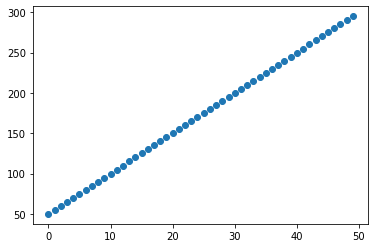

In [58]:
def linear_dataset(count=50, y_intercept=0, slope=1, spread=1.0):
    X = np.array([i+(uniform(-spread, spread)) for i in range(count)])
    y = np.array([y_intercept+i*slope+(uniform(-spread, spread)) for i in range(count)])
    return X, y

data_X, data_y = linear_dataset(50, 50.0, 5, 0)
plt.scatter(data_X, data_y)

50.0 50.0
est 1617.0000867532508
exact 49.0


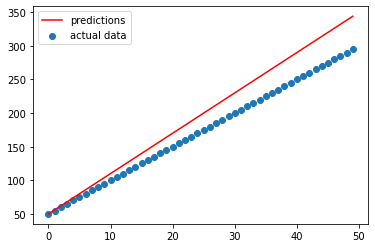

In [69]:
h0 = 50
h1 = 6

def forward(xdata, h0, h1):
    return h0+xdata*h1

def cost(h0, h1, xdata, ydata):
    a = forward(xdata, h0, h1)
    return (1/len(ydata))*(np.sum((ydata-a)**2))

preds = forward(data_X, h0, h1)

plt.plot(data_X, preds, c='r')
plt.scatter(data_X, data_y)
print(preds[0], data_y[0])
plt.legend(['predictions', 'actual data'])

def derive(h0, h1, xdata, ydata):
    delta = 0.0000001
    a = cost(h0, h1+delta, xdata, ydata) - cost(h0, h1, xdata, ydata)
    return a/delta

print('est', derive(h0, h1, data_X, data_y))
der = (-2/len(data_y))*((np.sum(data_y-preds)))
print('exact', der)

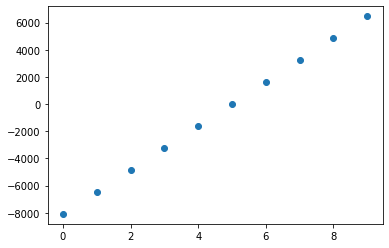

(-24.5, -245.0, 196.0)

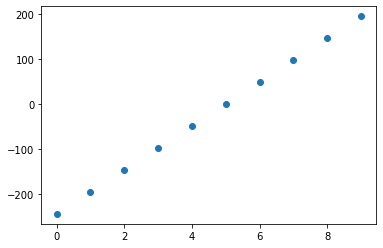

In [85]:
lol, lol2 = np.zeros(10), np.zeros(10)
for i in range(0, 10):
    lol[i] = derive(h0, i, data_X, data_y)
    preds = forward(data_X, h0, i)
    lol2[i] = (-2/len(data_y))*((np.sum(data_y-preds)))
    
plt.scatter([*range(0,10)], lol)
plt.show()
plt.scatter([*range(0,10)], lol2)
lol2.mean(), lol2.min(), lol2.max()